In [7]:
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
import sagemaker

SETTINGS

In [11]:
framework = "sklearn"
version = "1.2-1"
region = "eu-west-1"
model_name = "my-logistic-model-from-training-job-new"
model_path = 's3://sagemaker-eu-west-1-211125740051/trainin-job-simple-03-2024-07-01-15-02-57-857/output/model.tar.gz' # Specify the S3 path where the trained model is stored


GET URI OF A DOCKER CONTAINER

In [12]:
image_uri = image_uris.retrieve(framework, region, version=version)
print(f"The URI for the Sklearn image is: {image_uri}")

The URI for the Sklearn image is: 141502667606.dkr.ecr.eu-west-1.amazonaws.com/sagemaker-scikit-learn:1.2-1-cpu-py3


CREATE BASIC OBJECTS

In [15]:
role = get_execution_role()
sagemaker_session = sagemaker.Session()
sagemaker_client = boto3.client('sagemaker')

CREATE THE MODEL

In [16]:
# Create the model
response = sagemaker_client.create_model(
    ModelName=model_name,
    PrimaryContainer={
        "Image": image_uri,
        "ModelDataUrl": model_path,
        "Environment": {
            'SAGEMAKER_PROGRAM': 'inference.py',  # Specify the inference script
            'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model'  # Ensure the script can be found in the model directory
        }
    },
    ExecutionRoleArn=role,
)

The model is available
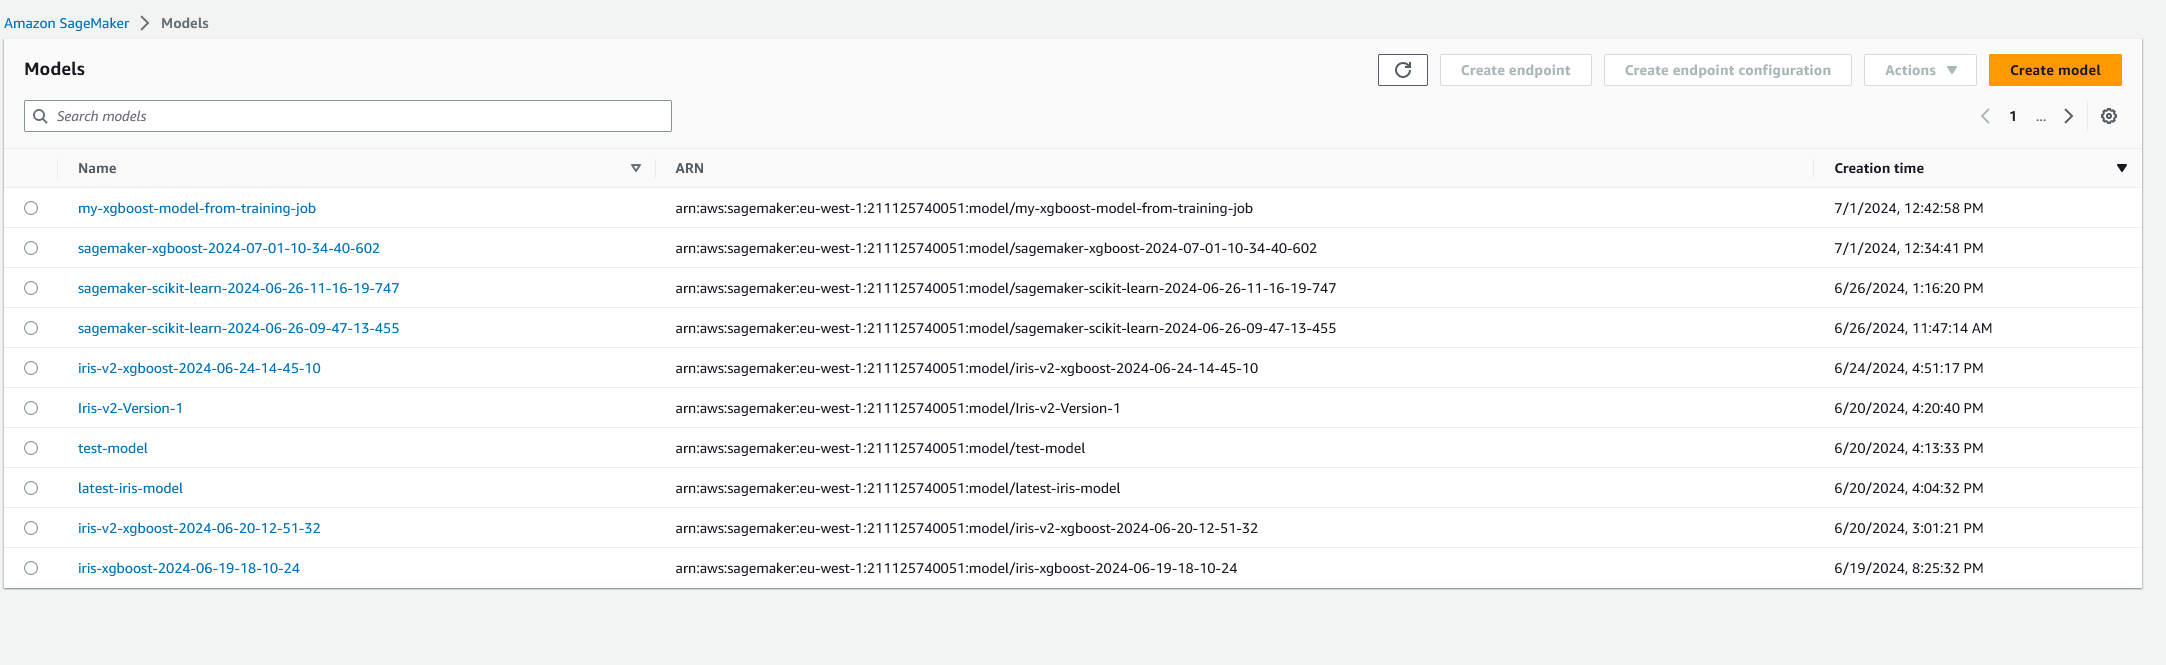